### K-means clustering

An implementation of k-means algorithm. <br>
Experiments have been conducted with the changes in the initial cluster centroids by choosing good, bad, random and farthest first initialization. <br>
In farthest first initialization, first a random data point is chosen as the initial cluster centroid, then the farthest data points from the previously chosen cluster centroid. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
#loading the dataset
mat = scipy.io.loadmat('...\\data1.mat',struct_as_record=False, squeeze_me=True)
#print(type(mat))
X=mat['X']
#print(type(X))
print("X.shape ==> ",X.shape)


x = X[:,0]
y = X[:,1]

X.shape ==>  (300, 2)


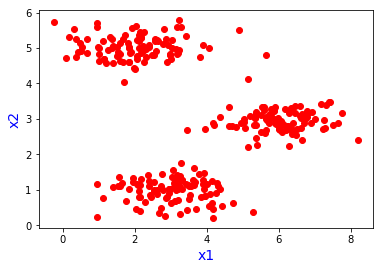

In [3]:
plt.plot(x, y,'ro')
plt.xlabel('x1', fontsize=14, color='blue')
plt.ylabel('x2', fontsize=14, color='blue')
plt.show()

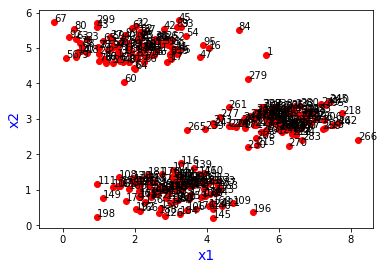

In [4]:
plt.plot(x, y,'ro')
plt.xlabel('x1', fontsize=14, color='blue')
plt.ylabel('x2', fontsize=14, color='blue')
for i in range(X.shape[0]):
    plt.text(x[i],y[i],str(i))
plt.show()

In [5]:
#Helper function for distance calculation btw two data points
def Euclidean_dist(sample1, sample2):
    squared_distance =np.sum((sample1 - sample2)**2)
    ed = np.sqrt(squared_distance)
    return ed

In [6]:
#Helper function for sum of within cluster distanc
def Sum_dists(data,centroids,clusters):
    k=centroids.shape[0]
    sum_dist=np.zeros(k)
    for i in range(k):
        idx=(clusters==i)
        tmp=data[idx,:]
        tmp_sum_dist=0
        for j in range(tmp.shape[0]):
            tmp_sum_dist+=Euclidean_dist(tmp[j,:],centroids[i,:])
        sum_dist[i]=tmp_sum_dist 
        
    return sum_dist

In [7]:
#Helper function for mean of within cluster distanc
def Mean_dists(data,centroids,clusters):
    k=centroids.shape[0]
    mean_dist=np.zeros(k)
    for i in range(k):
        idx=(clusters==i)
        tmp=data[idx,:]
        tmp_sum_dist=0
        for j in range(tmp.shape[0]):
            tmp_sum_dist+=Euclidean_dist(tmp[j,:],centroids[i,:])
        mean_dist[i]=tmp_sum_dist/tmp.shape[0] 
        
    print("Mean of inter distances for each cluster ==> ",mean_dist)
    return np.mean(mean_dist)

In [12]:
def My_kmeans(data,seeds,k=3,max_iter=20):
    N_sample=data.shape[0]
    N_features=data.shape[1]
    
    centroids=np.zeros((k,N_features))
    clusters=np.zeros((N_sample))
    
    for i in range(k):
        centroids[i,:] = data[seeds[i],:]
    
    for iter in range(max_iter):
        old_centroids=centroids.copy()
        for i in range(N_sample):
            dist=np.zeros((k))
            for j in range(k):
                dist[j]=Euclidean_dist(data[i,:],centroids[j,:])
            clusters[i]=np.argmin(dist)
        # find new centroids
        for i in range(k):
            idx=(clusters==i)
            tmp=data[idx,:]
            centroids[i,:] = np.mean(tmp,0)
            
        # Chech for stop   
        if ((old_centroids==centroids).all()): 
            print("Ieration ==> ",iter+1)
            return centroids,clusters
#        old_clusters=[]
        
    centroids=old_centroids  
    print("Ieration ==> ",iter+1)        
    return centroids,clusters


#### Start with random seeds 

Ieration ==>  2
Mean of inter distances for each cluster ==>  [0.717098  2.2492536 2.0046451]
Mean of all distances ==> 1.656998898638711
With-in cluster distances for clusters (0 to K) =>  [ 49.47976167 177.69103433 304.70605545]
Sum of all With-in cluster distances ==> 531.8768514435551


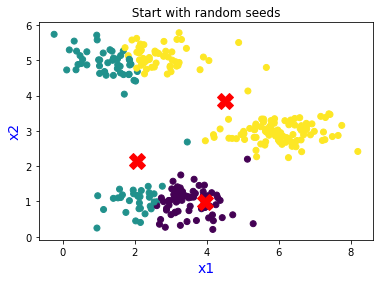

In [20]:
seeds=np.random.choice(X.shape[0],3)
centroids,clusters=My_kmeans(X,seeds, max_iter=2)
m_dist=Mean_dists(X,centroids,clusters)
print("Mean of all distances ==>",m_dist)
s_dist=Sum_dists(X,centroids,clusters)
print("Within cluster distances for clusters (0 to K) => ",s_dist)
print("Sum of all Within cluster distances ==>",np.sum(s_dist))
plt.scatter(x, y,c=clusters)
plt.plot(centroids[:,0],centroids[:,1],'rX',markersize=16)
plt.xlabel('x1', fontsize=14, color='blue')
plt.ylabel('x2', fontsize=14, color='blue')
plt.title(" Start with random seeds ")
plt.show()

#### Start with good seeds 

Ieration ==>  2
Mean of inter distances for each cluster ==>  [0.81200852 0.85334295 0.73213443]
Mean of all distances ==> 0.7991619666570221
With-in cluster distances for clusters (0 to K) =>  [82.82486887 84.48095219 72.4813086 ]
Sum of all With-in cluster distances ==> 239.78712965207387


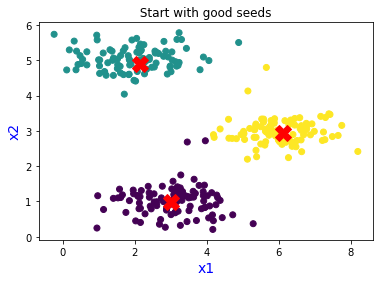

In [22]:
seeds=np.array([198,42,218])
centroids,clusters=My_kmeans(X,seeds, max_iter=2)
m_dist=Mean_dists(X,centroids,clusters)
print("Mean of all distances ==>",m_dist)
s_dist=Sum_dists(X,centroids,clusters)
print("Within cluster distances for clusters (0 to K) => ",s_dist)
print("Sum of all Within cluster distances ==>",np.sum(s_dist))
plt.scatter(x, y,c=clusters)
plt.plot(centroids[:,0],centroids[:,1],'rX',markersize=16)
plt.xlabel('x1', fontsize=14, color='blue')
plt.ylabel('x2', fontsize=14, color='blue')
plt.title(" Start with good seeds ")
plt.show()

####  Start with bad seeds 

Ieration ==>  3
Mean of inter distances for each cluster ==>  [0.88284706 0.84224901 1.47070176]
Mean of all distances ==> 1.065265941367247
With-in cluster distances for clusters (0 to K) =>  [ 67.97922326  83.38265167 182.3670185 ]
Sum of all With-in cluster distances ==> 333.7288934218766


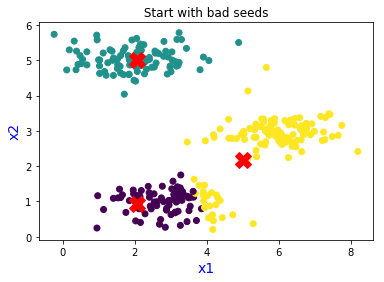

In [33]:
seeds=np.array([198,111,149])
centroids,clusters=My_kmeans(X,seeds, max_iter=3)
m_dist=Mean_dists(X,centroids,clusters)
print("Mean of all distances ==>",m_dist)
s_dist=Sum_dists(X,centroids,clusters)
print("Within cluster distances for clusters (0 to K) => ",s_dist)
print("Sum of all Within cluster distances ==>",np.sum(s_dist))
plt.scatter(x, y,c=clusters)
plt.plot(centroids[:,0],centroids[:,1],'rX',markersize=16)
plt.xlabel('x1', fontsize=14, color='blue')
plt.ylabel('x2', fontsize=14, color='blue')
plt.title(" Start with bad seeds ")
plt.show()


Ieration ==>  2
Mean of inter distances for each cluster ==>  [1.00861152 0.82961626 0.75986567]
Mean of all distances ==> 0.866031147060797
With-in cluster distances for clusters (0 to K) =>  [105.9042093   81.3023933   73.70696959]
Sum of all With-in cluster distances ==> 260.91357218985513


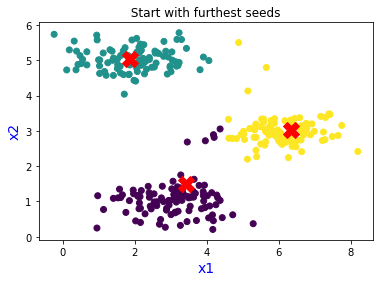

In [49]:
LEN=X.shape[0]
seed1=np.random.choice(LEN,1)
dist=np.zeros(LEN)
#calculate distance btw all datapoints and the first seed
for i in range(LEN):
    dist[i]=Euclidean_dist(X[i,:],X[seed1,:])

dist[seed1]=-np.inf #exclude the selected datapoint as seed from distance list by asigning -np.inf
seed2=np.argmax(dist) #find the furthest sample from seed1
dist[seed2]=-np.inf   # exclude the seed2 data sample from seed1
#calculate distance btw all datapoints and the second seed
dist2=np.zeros(LEN)
for i in range(LEN):
    dist2[i]=Euclidean_dist(X[i,:],X[seed2,:])

dist2[seed1]=-np.inf #exclude the selected datapoint as seed1 from dist2
dist2[seed2]=-np.inf #exclude the selected datapoint as seed2 from dist2
seed3=np.argmax(dist2) #find the furthest sample from seed2

seeds=([seed1,seed2,seed3])
centroids,clusters=My_kmeans(X,seeds, max_iter=2)
m_dist=Mean_dists(X,centroids,clusters)
print("Mean of all distances ==>",m_dist)
s_dist=Sum_dists(X,centroids,clusters)
print("Within cluster distances for clusters (0 to K) => ",s_dist)
print("Sum of all Within cluster distances ==>",np.sum(s_dist))
plt.scatter(x, y,c=clusters)
plt.plot(centroids[:,0],centroids[:,1],'rX',markersize=16)
plt.xlabel('x1', fontsize=14, color='blue')
plt.ylabel('x2', fontsize=14, color='blue')
plt.title(" Start with furthest seeds ")
plt.show()